# Air Quality Prediction Project

The objective of this project is to predict PM2.5 particulate matter concentration in the air for some locations in Uganda.

PM2.5 refers to atmospheric particulate matter that has a diameter of less than 2.5 micrometers and is one of the most harmful air pollutants. 

PM2.5 is a common measure of air quality that normally requires ground-based sensors to measure.

In [ ]:
!pip install numpy 
!pip install seaborn 
!pip install panda 
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load the packages

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ID_JBYXJEUZ8X,2020-03-18,ANQ16PZJ,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,ID_PEJJNLBUPR,2019-10-13,AB6051M4,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,ID_21L8UZQO1T,2019-12-21,A0WN66FH,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,ID_GNW2G8J4T8,2020-02-20,aq_41,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,ID_4XOX2V6SK0,2019-04-17,aq_41,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229


In [ ]:
data.tail()

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
11131,ID_E2O117AYG3,2020-07-20,APZ80RTM,0.306666,32.608550,0.736872,22.965972,NaN,NaN,NaN,...,7156.016834,48356.941077,6156.016834,3.419584,0.235853,72.847686,50.858546,-31.908548,24.023105,69.690417
11132,ID_8CJG37XAYN,2020-02-23,aq_60,0.307780,32.651449,0.721721,26.555392,-0.000684,0.41426,-0.000283,...,13266.058594,20344.134766,12266.058594,10.198909,0.284046,-97.272919,64.089607,-109.482361,32.003708,47.470518
11133,ID_NTRI2J528O,2020-04-17,AJCK5L86,0.343898,32.587226,0.810413,22.915625,NaN,NaN,NaN,...,7754.737305,44284.785156,6754.737305,5.724823,0.299491,-98.203743,53.532288,-70.173080,32.261959,43.237917
11134,ID_IBH41YUMOZ,2020-06-08,aq_76,0.357987,32.584100,0.876437,21.258333,NaN,NaN,NaN,...,6357.190430,53044.425781,5357.190430,49.711514,0.279414,71.634727,61.877548,-26.566027,25.409733,25.599925
11135,ID_44EJBIBS7D,2019-10-30,aq_46,0.298750,32.615000,0.868209,22.238333,NaN,NaN,NaN,...,5046.156250,62448.808594,4046.156494,12.753333,0.295881,-99.703812,37.296741,-115.526276,34.218605,27.089820


In [ ]:
data.shape

(11136, 71)

In [ ]:
data.isnull().sum().sum()

257602

HYPOTHESIS GENERATION

1. Temperature increases the particulate matter concentration. 
2. Humidity increases the particulate matter concentration. 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11136 entries, 0 to 11135
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        11136 non-null  object 
 1   date                                                      11136 non-null  object 
 2   device                                                    11136 non-null  object 
 3   site_latitude                                             11136 non-null  float64
 4   site_longitude                                            11136 non-null  float64
 5   humidity                                                  11136 non-null  float64
 6   temp_mean                                                 11115 non-null  float64
 7   SulphurDioxide_SO2_column_number_density                  4835 non-null   float64
 8   SulphurDioxide_S

## Exploratory Data Analysis

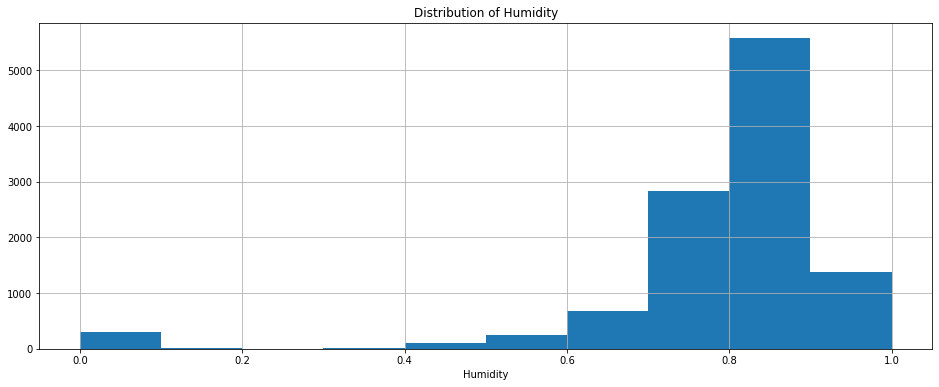

In [ ]:
#Distribution of Humidity

plt.figure(figsize=(16, 6))
data.humidity.hist() 
plt.xlabel('Humidity')  
plt.title('Distribution of Humidity') 
plt.show()

Most areas in which the data was collected were humid.

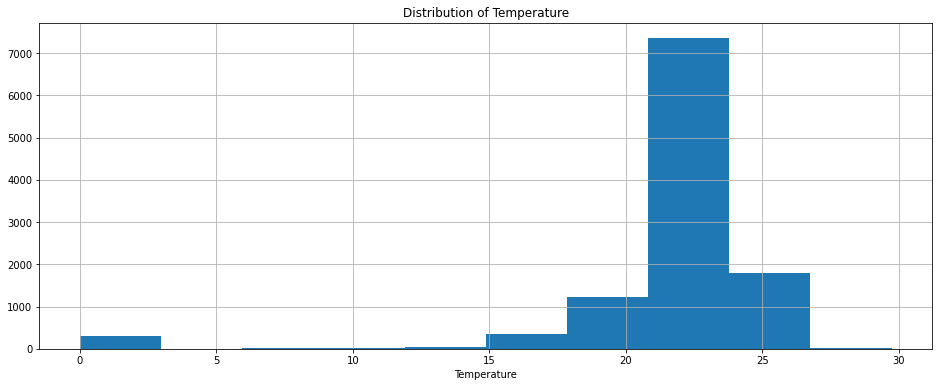

In [ ]:
#Distribution of Temperature

plt.figure(figsize=(16, 6))
data.temp_mean.hist() 
plt.xlabel('Temperature')  
plt.title('Distribution of Temperature') 
plt.show()

Most values of Temperature in our data set were between 20 and 25 degrees.

Text(0.5, 1.0, 'Particulate Matter Concentration Against Date')

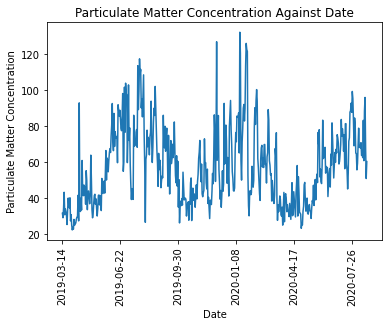

In [ ]:
data.groupby('date')['pm2_5'].mean().plot() 
plt.xticks( 
    rotation = 90
) 
plt.xlabel('Date') 
plt.ylabel('Particulate Matter Concentration') 
plt.title('Particulate Matter Concentration Against Date') 

In 2020, the particulate matter concentration was the highest.

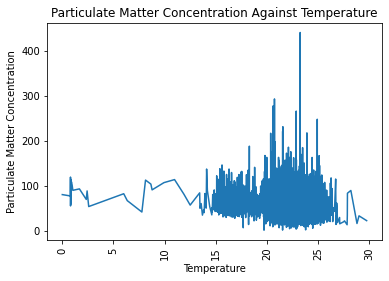

In [ ]:
data.groupby('temp_mean')['pm2_5'].mean().plot() 
plt.xticks( 
    rotation = 90
) 
plt.xlabel('Temperature') 
plt.ylabel('Particulate Matter Concentration')  
plt.title('Particulate Matter Concentration Against Temperature') 
plt.show()

Particulate Matter Concentration is the highest at room temperature as seen above.

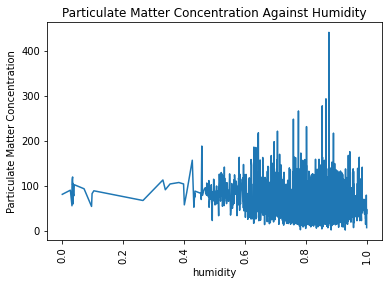

In [ ]:
data.groupby('humidity')['pm2_5'].mean().plot() 
plt.xticks( 
    rotation = 90
) 
plt.xlabel('humidity') 
plt.ylabel('Particulate Matter Concentration')  
plt.title('Particulate Matter Concentration Against Humidity') 
plt.show()

Particulate matter Concentration is the highest during high humidity, meaning the air is very saturated.

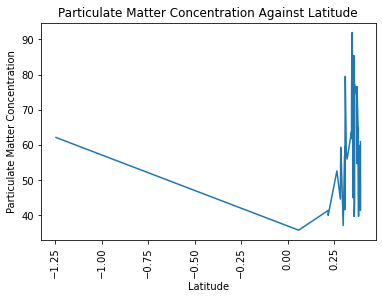

In [ ]:
data.groupby('site_latitude')['pm2_5'].mean().plot() 
plt.xticks( 
    rotation = 90
) 
plt.xlabel('Latitude') 
plt.ylabel('Particulate Matter Concentration')  
plt.title('Particulate Matter Concentration Against Latitude') 
plt.show()

Particulate matter concentration decreases linearly as it approaches the equator. 

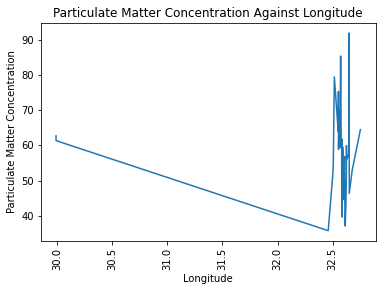

In [ ]:
data.groupby('site_longitude')['pm2_5'].mean().plot() 
plt.xticks( 
    rotation = 90
) 
plt.xlabel('Longitude') 
plt.ylabel('Particulate Matter Concentration')  
plt.title('Particulate Matter Concentration Against Longitude') 
plt.show()

The particulate matter concentration exhibits a linear relationship between 30 and 32.5 degrees longitude

# Feature Engineering and Selection

In [ ]:
#get info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11136 entries, 0 to 11135
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        11136 non-null  object 
 1   date                                                      11136 non-null  object 
 2   device                                                    11136 non-null  object 
 3   site_latitude                                             11136 non-null  float64
 4   site_longitude                                            11136 non-null  float64
 5   humidity                                                  11136 non-null  float64
 6   temp_mean                                                 11115 non-null  float64
 7   SulphurDioxide_SO2_column_number_density                  4835 non-null   float64
 8   SulphurDioxide_S

In [ ]:
#Check the shape before dropping
data.shape

(11136, 71)

In [ ]:
#Drop columns with atleast s
data.dropna(axis='columns',thresh=4455,inplace=True)

In [ ]:
data.shape

(11136, 59)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11136 entries, 0 to 11135
Data columns (total 59 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        11136 non-null  object 
 1   date                                                      11136 non-null  object 
 2   device                                                    11136 non-null  object 
 3   site_latitude                                             11136 non-null  float64
 4   site_longitude                                            11136 non-null  float64
 5   humidity                                                  11136 non-null  float64
 6   temp_mean                                                 11115 non-null  float64
 7   SulphurDioxide_SO2_column_number_density                  4835 non-null   float64
 8   SulphurDioxide_S

In [ ]:
#fill missing values with mean
for col in data.columns: 
  if data[col].isnull().sum().sum() > 0 : 
    data[col].fillna(data[col].mean(), inplace = True) 

In [ ]:
#Check Null Values
data.isnull().sum().sum()

0

In [ ]:
#Drop object columns
for col in data.columns:
  if data[col].dtype == 'object': 
    data = data.drop(col, axis = 1)

In [ ]:
#check shape
data.shape

(11136, 56)

In [ ]:
#Check contents of data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11136 entries, 0 to 11135
Data columns (total 56 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   site_latitude                                             11136 non-null  float64
 1   site_longitude                                            11136 non-null  float64
 2   humidity                                                  11136 non-null  float64
 3   temp_mean                                                 11136 non-null  float64
 4   SulphurDioxide_SO2_column_number_density                  11136 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              11136 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            11136 non-null  float64
 7   SulphurDioxide_cloud_fraction                             11136 non-null  float64
 8   SulphurDioxide_s

In [ ]:
#Create Features and Target
target = data['pm2_5'] 
features = data.drop('pm2_5',axis =1)

In [ ]:
#check shape
features.shape

(11136, 55)

In [ ]:
# import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1)) 

for col in features: 
  data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))

In [ ]:
print(data.head()) 
print(data.tail())

   site_latitude  site_longitude  humidity  temp_mean  \
0       0.976771        0.930429  0.846844   0.741165   
1       0.999550        0.938367  0.874493   0.724595   
2       0.935393        0.936944  0.729340   0.792623   
3       0.000000        0.000000  0.919271   0.549472   
4       0.000000        0.000000  0.858365   0.558335   

   SulphurDioxide_SO2_column_number_density  \
0                                  0.298563   
1                                  0.355822   
2                                  0.355822   
3                                  0.307786   
4                                  0.302200   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.541242   
1                                      0.346473   
2                                      0.346473   
3                                      0.314098   
4                                      0.347040   

   SulphurDioxide_SO2_slant_column_number_density  \
0             

# Modelling

In [ ]:
#Create new variables for features and Target so as to get a better understanding
X = features
y = target

In [ ]:
y

0        63.853333
1        32.507083
2        80.290833
3        42.601687
4        89.642229
           ...    
11131    69.690417
11132    47.470518
11133    43.237917
11134    25.599925
11135    27.089820
Name: pm2_5, Length: 11136, dtype: float64

In [ ]:
# divide data into training and validation subsets  

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
#Import important Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error  

#Create a dumb model and 
model = RandomForestRegressor(n_estimators=120, random_state=0)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

#Used Mean Absolute Error as told from the competition
print(f'The mean absolute error : {mean_absolute_error(y_test,y_predict)}')

The mean absolute error : 10.094792650948264
